In [1]:
suppressPackageStartupMessages(library(rstanarm))
suppressPackageStartupMessages(library(ggformula))
library(tibble)
suppressPackageStartupMessages(library(glue))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(modelr))
library(stringr)

In [2]:
# Set the maximum number of columns and rows to display
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
# Set the default plot size
options(repr.plot.width=18, repr.plot.height=12)

In [3]:
download_if_missing <- function(filename, url) {
    if (!file.exists(filename)) {
        dir.create(dirname(filename), showWarnings=FALSE, recursive=TRUE)
        download.file(url, destfile = filename, method="curl")
    }
}

# Graphing binary data and logistic regression

Reproduce Figure 14.1 with the model, $ {\rm Pr}(y = 1) = {\rm logit}^{-1}(0.4 - 0.3 x)$, with 50 data points $x$ sampled uniformly in the range $[A, B]$.
(In Figure 14.1 the $x$'s were drawn from a normal distribution.)
Choose values $A$ and $B$ so that the plot includes a zone where the values of $y$ are all 1, a zone where they are all 0, and a band of overlap in the middle.

The inverse logit is very close 1/0 at +/-5
Since the coefficient of x is negative it will have high probability at low value (near A) and low probability at high value (near B).

So we want 0.4 - 0.3 A = 5 and so 

In [4]:
(A <- (5 - 0.4) / (-0.3))

[1] -15.33333

And we want 0.4 - 0.3 B = -5, and so

In [5]:
(B <- (-5 - 0.4) / (-0.3))

[1] 18

In [6]:
x <- runif(50, A, B)
ps <- invlogit(0.4 - 0.3 * x)

y <- rbinom(50, 1, p=ps)

fake_data = data.frame(x,y)

In [7]:
model <- stan_glm(y ~ x, family=binomial(link="logit"), data=fake_data, refresh=0)

In [8]:
library(tidyr)

In [9]:
curve_data <- data.frame(x=seq(A,B,by=0.01)) %>%
mutate(`Fitted Curve` = predict(model, newdata=., type="response"),
       `True Curve` = invlogit(0.4 - 0.3 * x))  %>%
pivot_longer(c(-x), values_to="y") %>%
mutate(name=forcats::fct_rev(name))

Here's something close to 14.1 a

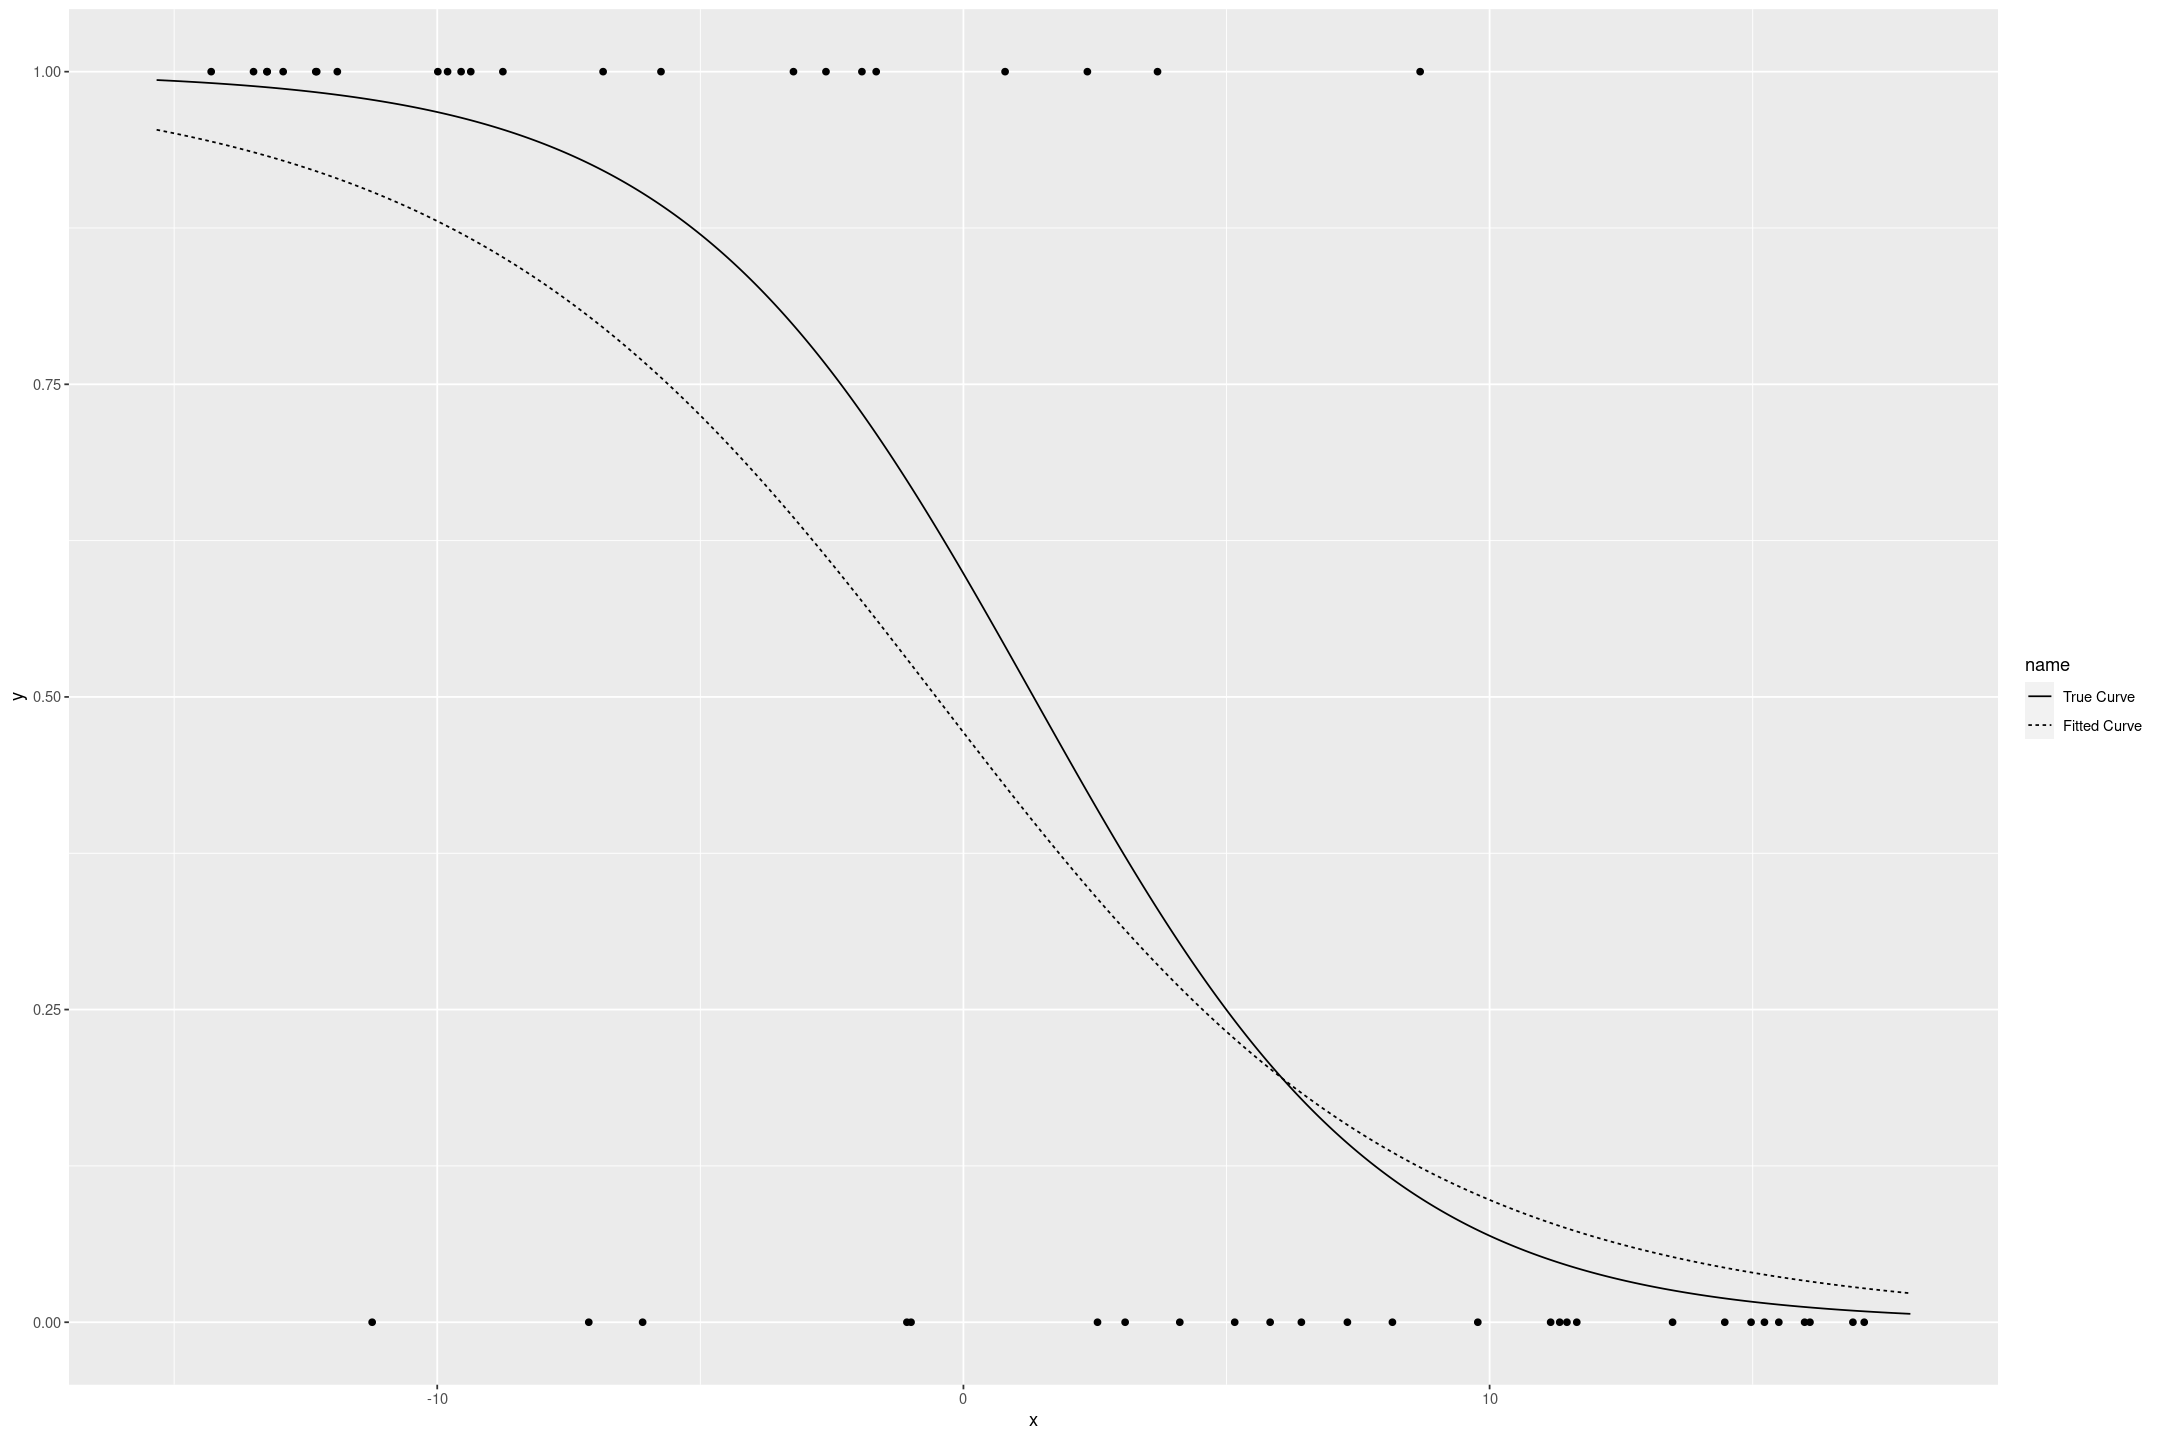

In [10]:
fake_data %>%
gf_point(y ~ x) %>%
gf_line(y ~ x, group=~name, linetype=~name, data=curve_data)

Here's something close to 14.1 b

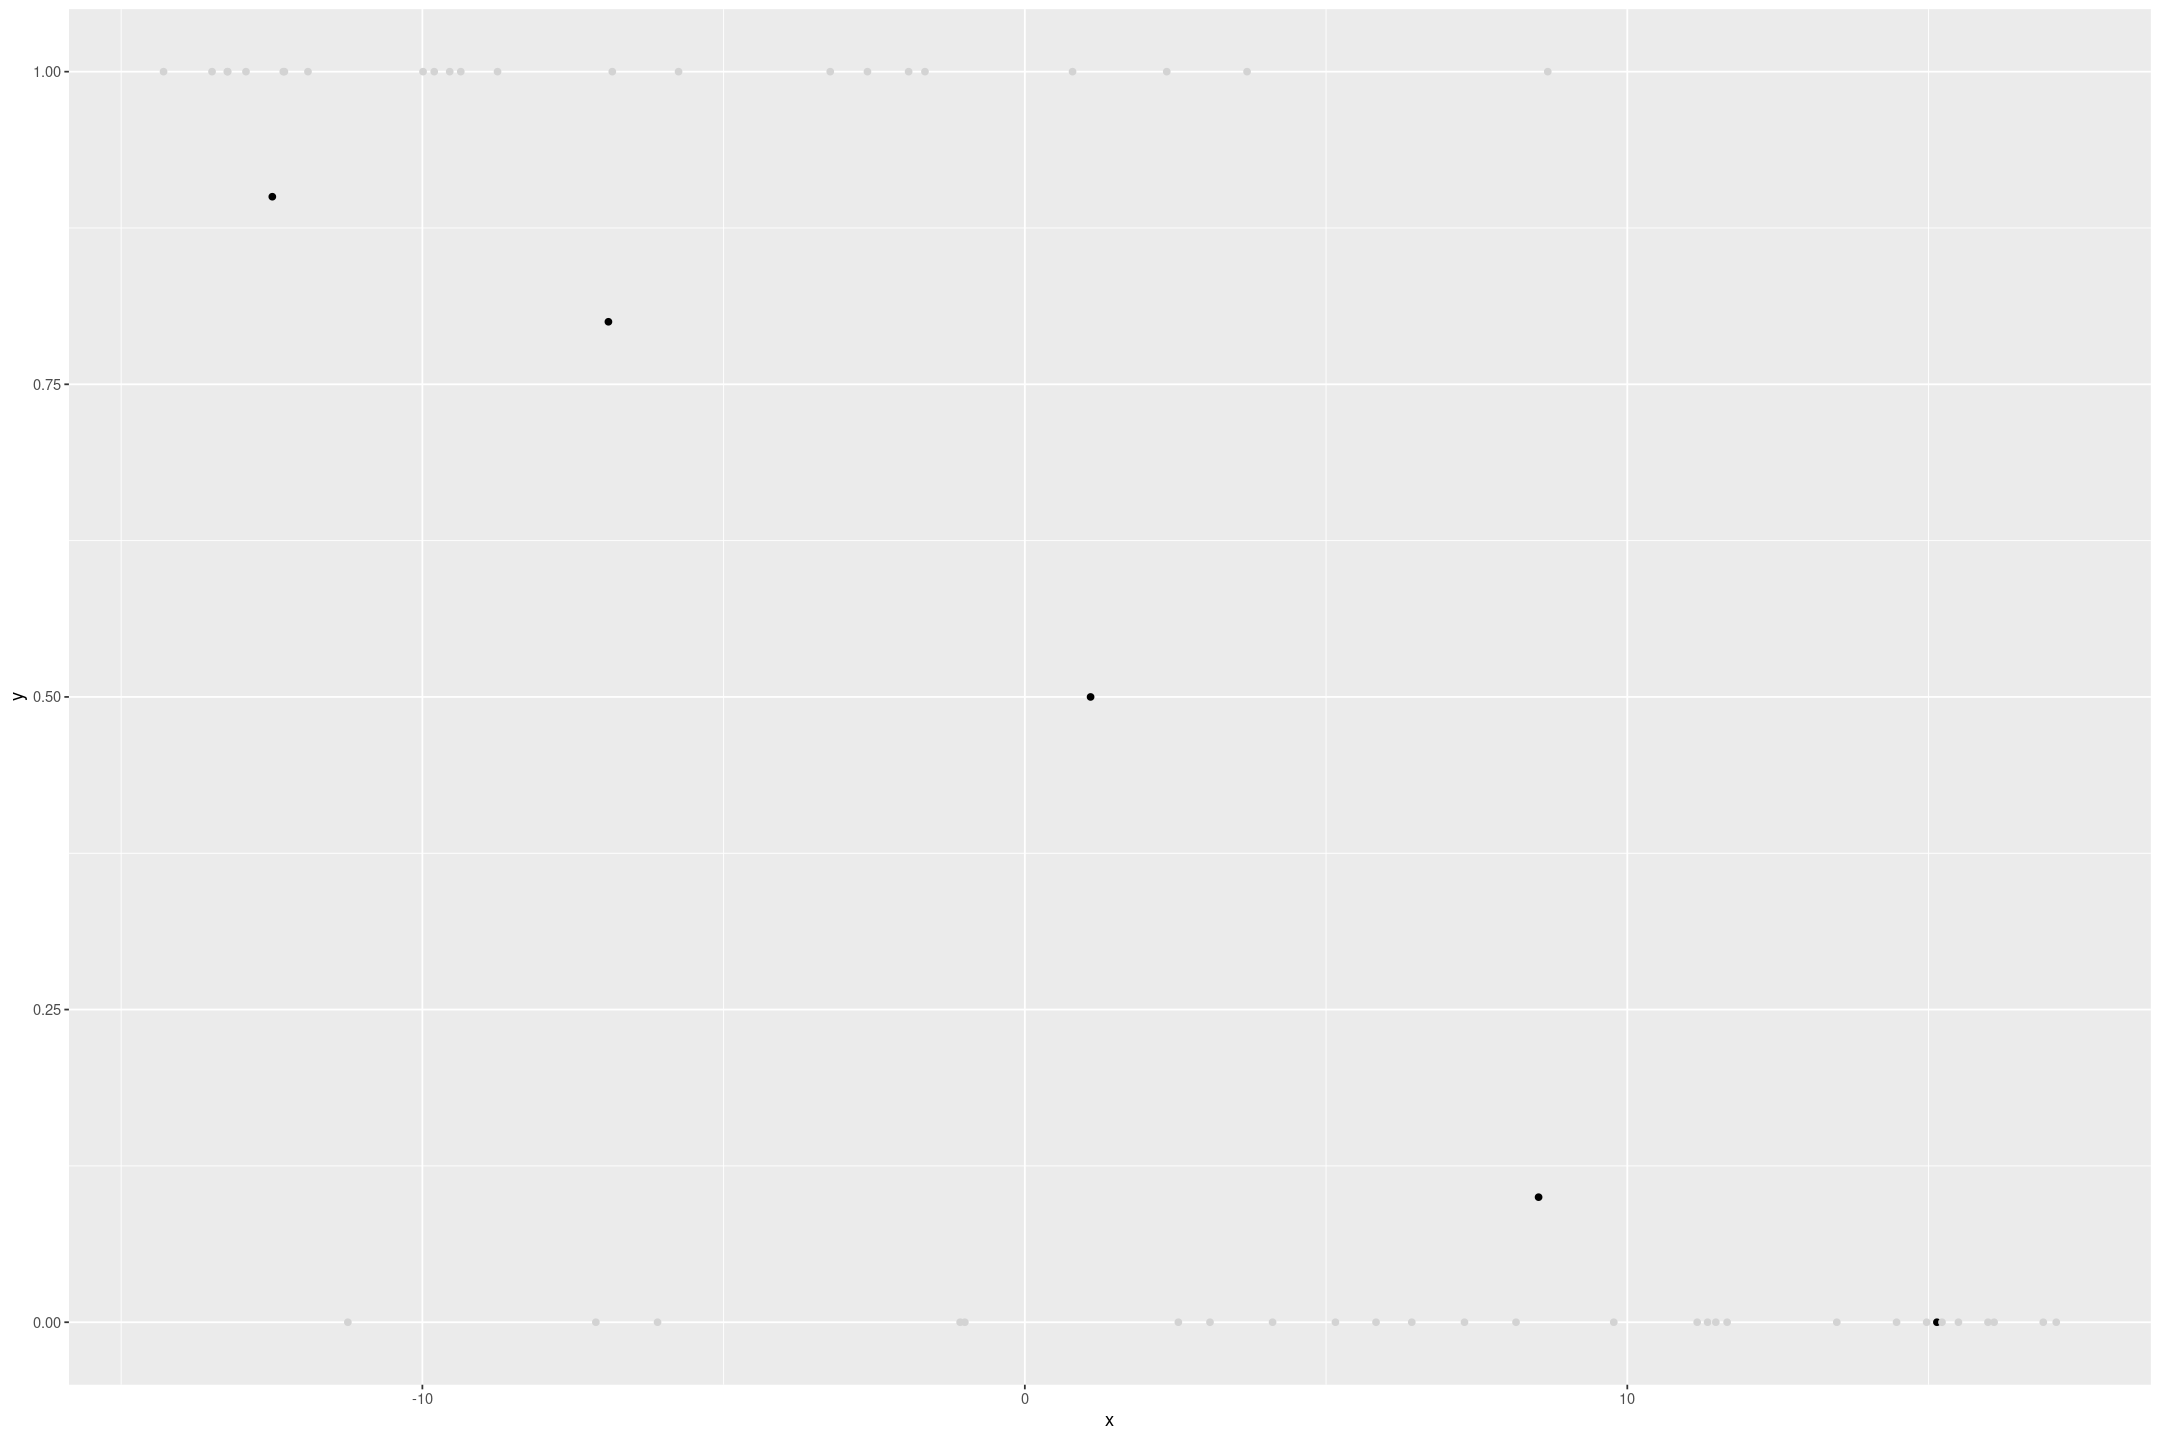

In [11]:
n_bin <- 5

fake_data %>%
mutate(bin = cut(x, quantile(x, seq(0, 1, length.out=n_bin+1)), include.lowest=TRUE)) %>%
group_by(bin) %>%
summarise(x = mean(x), y = mean(y)) %>%
gf_point(y ~ x) %>%
gf_point(y ~ x, data=fake_data, colour="lightgrey")

# Logistic regression and discrimination lines

Reproduce Figure 14.2 with the model, ${\rm Pr}(y = 1) = {\rm logit}^{-1}(0.4 - 0.3 x_1 + 0.2 x_2)$, with $(x_1,x_2)$ sampled uniformly from the rectangle $[A_1, B_1] \times [A_2, B_2]$.
Choose the values $A_1, B_1, A_2, B_2$ so that the plot includes a zone where the values of $y$ are all 1, a zone where they are all 0, and a band of overlap in the middle, and with the three lines corresponding to ${\rm Pr}(y=1) = 0.1$, $0.5$ and $0.9$ are all visible.

# Graphing logistic regressions

The well-switching data described in Section 13.7 are in the folder `Arsenic`.

In [12]:
filename <- "./data/Arsenic/wells.csv"

download_if_missing(filename,
                    'https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Arsenic/data/wells.csv')

wells <- read.csv(filename)

## Switching probability with log distance

Fit a logistic regression for the probability of switching using log(distance to the nearest safe well) as a predictor.

## Plotting model predictions

Make a graph similar to Figure 13.8b displaying Pr(switch) as a function of distance to nearest safe well, along with the data.

## Residual Plots

Make a residual plot and binned residual plot as in Figure 14.8

## Comparing error with null model

Compute the error rate of the fitted model and compare to the error rate of the null model.

## Grouped distance model

Create indicator variables corresponding to `dist < 100`; `dist` between 100 and 200; and `dist > 200`.
Fit a logistic regression for Pr(switch) using these indicators.
With this new model, repeat the computation and graphs for part 1 of this exercise.

# Working with logistic regression

Perform a logistic regression for a problem of interest to you.
This can be from a research project, a previous class, or data you download.
Choose one variable of interest to be the outcome, which will take on the values 0 and 1 (since you are doing a logistic regression).

## Analysing Data

Analyse the data in R.

## Fitting many models

Fit several different versions of your model.
Try including different predictors, interactions and transformations of the inputs.

## Analysing Model

Choose one particular formulation of the model and do the following:

### Effect of data points
Describe how each input affects ${\rm Pr}(y=1)$ in the fitted model.
You must consider the estimated coefficient, the range of the input values and the nonlinear inverse logit function.

### Error rate

What is the error rate of the fitted model?
What is the error rate of the null model?

### Comparing with null model

Compare the fitted and null models using leave-one-out cross validation.
Does the improvement in fit seem to be real?

### Making Predictions

Use the model to make predictions for some test cases of interest.

### Estimating by simulation

Use the simulations from the `stan_glm` output to create a 50% interval for some nonlinear function of parameters (for example, $\beta_1 / \beta_2 $).

# Working with logistic regression

In a class of 50 students, a logistic regression is performed of course grade (pass or fail) on midterm exam score (continuous values with mean 60 and standard deviation 15).
The fitted model is ${\rm Pr}({\rm pass}) = {\rm logit}^{-1}(-24 + 0.4x)$.

## Graphing model

Graph the fitted model.
Also on this graph put a scatterplot of hypothetical data consistent with the information given.

## Linear transformation of inputs

Suppose the midterm scores were transformed to have a mean of 0 and a standard deviation of 1.
What would be the equation of the logistic regression using these transformed scores as a new predictor?

## Adding noise predictor

Create a new predictor that is pure noise; for example, in R you can create `newpred <- rnorm(n,0,1)`.
Add it to your model.
How much does the leave-one-out cross validation score decrease?

# Limitations of logistic regression

Consider a dataset with $n=20$ points, a single predictor $x$ that takes on the values $1, \ldots, 20$, and a binary data $y$.
Construct data values $y_1, \ldots, y_20$, that are inconsistent with any logistic regression on $x$.
Fit a logistic regression to these data, plot the data and fitted curve, and explain why you can say that the model does not fit the data.

# Model building and comparison

Continue with the well-switching data.

In [13]:
wells %>% head()

,switch,arsenic,dist,dist100,assoc,educ,educ4
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,1,2.36,16.826,0.16826,0,0,0.00
2,1,0.71,47.322,0.47322,0,0,0.00
3,0,2.07,20.967,0.20967,0,10,2.50
4,1,1.15,21.486,0.21486,0,12,3.00
5,1,1.10,40.874,0.40874,1,14,3.50
6,1,3.90,69.518,0.69518,1,9,2.25


## Fit model on distance and log(arsenic)

Fit a logistic regression for the probability of switching using, as predictors, distance, log(arsenic), and their interaction.
Interpret the estimated coefficients and their standard errors.

## Graphing interactions

Make graphs as in Figure 14.3 to show the relation between probability of switching, distance and arsenic level.

## Average predictive difference

Following the procedure described in Section 14.4, compute the average predictive differences corresponding to:

1. A comparison of `dist = 0` to `dist = 100`, with `arsenic` held constant.

2. A comparison of `dist=100` to `dist=200`, with `aresenic` held constant.

3. A comparison of `arsenic=0.5` to `aresnic=1.0`, with `distance` held constant.

4. A comparison of `arsenic=1.0` to `aresnic=2.0`, with `distance` held constant.

# Learning from social science data

The General Social Survey (GSS) has been conducted in the United State every two years since 1972.

## Download data

Go to the GSS website and download the data.
Consider a question of interest that was asked in many rounds of the survey and convert it to a binary outcome, if it is not binary already.
Decide how you will handle nonresponse in your analysis.

## Graphing average over time

Make a graph of the average response of this binary variable over time, each year giving $\pm 1$ standard error bounds as in Figure 4.3

## Graphing coefficients over time

Set up a logistic regression model of this outcome variable given predictors for age, sex, education, and ethnicity.
Fit the model separately for each year that the equation was asked, and make a grid of plots with the time series of coefficient estimates $\pm$ standard errors over time.

## Next steps


Discuss the results and how you might want to expand your model to answer some social science question of interest.

# Linear or logistic regession for discrete data

Simulate continuous data from the regression model, $z = a + bx + {\rm error}$.
Set the parameters so that the outcomes $z$ are positive for about half the time and negative about half the time.

## Logistic model

Create a binary variable $y$ that equals 1 if $z$ is positive of 0 if $z$ is negative.
Fite a logistic regression predicting $y$ from $x$.

## Linear model

Fit a linear regression predicting $y$ from $x$: you can do this, even though the data $y$ are discrete.

## Comparing average predictive comparisons

Estimate the average predictive comparison - the expected difference in $y$, corresponding to a unit difference in $x$ - based on the fitted logistic regression.
Compare this average predictive comparison to the linear regression coefficient.

# Linear or logistic regression for discrete data

In the setup of the previous exercise:

## Example where logistic and linear are similar

Set the parameters of your simulation so that the coefficient estimate and the average predictive comparison are close.

## Example where logistic and linear are different

Set the parameters of your simulation so that the coefficient estimate and the average predictive comparison are much different.

## When is a linear model acceptable?

In general, when will it work reasonable well to fit a linear model to predict a binary outcome?